In [10]:
import numpy as np
import pandas as pd
from pca import PCADecomposition
from ica import ICADecomposition
from rp import RandomProjectionDecomposition
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import kurtosis

In [2]:
%load_ext autoreload
%autoreload 2

# MKT

In [7]:
dataset_path = "../datasets/cleaned_data/mkt_camp_v1/train.csv"
df = pd.read_csv(dataset_path)

# PCA

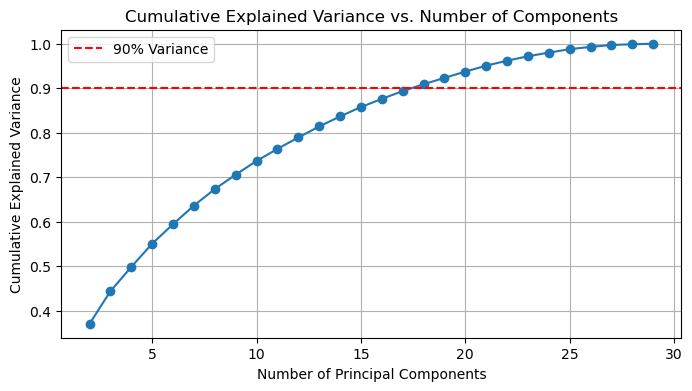

In [8]:
n_range = range(2, 30)
cumulative_variances = []

for n in n_range:
    pca_model = PCADecomposition(n_components=n)
    pca_model.fit(df)
    cumulative_variances.append(pca_model.cumulative_variance_[-1])

plt.figure(figsize=(8, 4))
plt.plot(n_range , cumulative_variances, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs. Number of Components")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
pca_model = PCADecomposition(n_components=20, save_data=True)
pca_model.fit(df)

pca_model.save_results(filename="../datasets/dr/mkt/pca_train.csv")
pca_model.save_model(filename="../model_checkpoints/mkt/pca_model.pkl")

# Test Dataset
dataset_path = "../datasets/cleaned_data/mkt_camp_v1/test.csv"
df_test = pd.read_csv(dataset_path)
PCADecomposition.inference("../model_checkpoints/mkt/pca_model.pkl", df_test, output_file="../datasets/dr/mkt/pca_test.csv")

Transformed data saved to ../datasets/dr/mkt/pca_train.csv
PCA model saved to ../model_checkpoints/mkt/pca_model.pkl
Loading PCA model from ../model_checkpoints/mkt/pca_model.pkl...
Model loaded successfully!
Transformed data saved to ../datasets/dr/mkt/pca_test.csv


# ICA

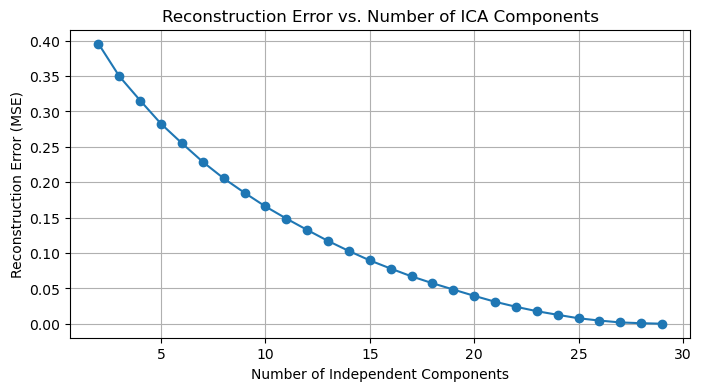

In [13]:
n_range = range(2, 30)
reconstruction_errors = []

for n in n_range:
    ica_model = ICADecomposition(n_components=n)
    ica_model.fit(df)
    reconstruction_errors.append(ica_model.reconstruction_error_)

plt.figure(figsize=(8, 4))
plt.plot(n_range, reconstruction_errors, marker='o', linestyle='-')
plt.xlabel("Number of Independent Components")
plt.ylabel("Reconstruction Error (MSE)")
plt.title("Reconstruction Error vs. Number of ICA Components")
plt.grid(True)
plt.show()

In [14]:
ica_model = ICADecomposition(n_components=20, save_data=True)
ica_model.fit(df)

ica_model.save_results(filename="../datasets/dr/mkt/ica_train.csv")
ica_model.save_model(filename="../model_checkpoints/mkt/ica_model.pkl")

# Test Dataset
dataset_path = "../datasets/cleaned_data/mkt_camp_v1/test.csv"
df_test = pd.read_csv(dataset_path)
ICADecomposition.inference("../model_checkpoints/mkt/ica_model.pkl", df_test, output_file="../datasets/dr/mkt/ica_test.csv")

Transformed data saved to ../datasets/dr/mkt/ica_train.csv
ICA model saved to ../model_checkpoints/mkt/ica_model.pkl
Loading ICA model from ../model_checkpoints/mkt/ica_model.pkl...
Model loaded successfully!
Transformed data saved to ../datasets/dr/mkt/ica_test.csv


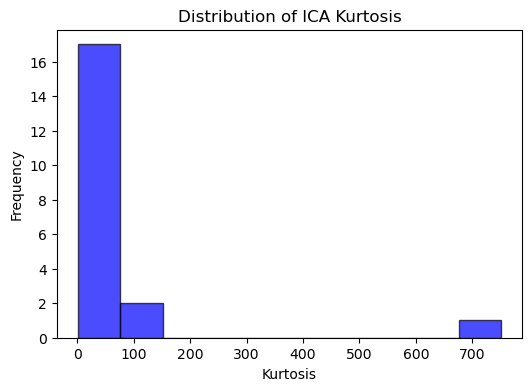

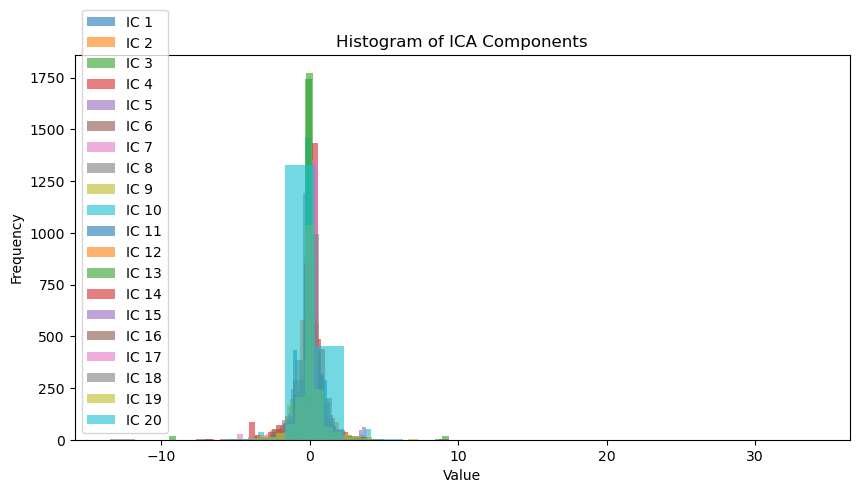

In [ ]:
X_ica = ica_model.fit(df)

ic_kurtosis = kurtosis(X_ica, axis=0, fisher=False)

plt.figure(figsize=(6, 4))
plt.hist(ic_kurtosis, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("Kurtosis")
plt.ylabel("Frequency")
plt.title("Distribution of ICA Kurtosis")
plt.show()

# Plot distribution of ICA components
plt.figure(figsize=(10, 5))
for i in range(X_ica.shape[1]):
    plt.hist(X_ica[:, i], bins=20, alpha=0.6, label=f"IC {i+1}")

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of ICA Components")
plt.legend()
plt.show()

# RP

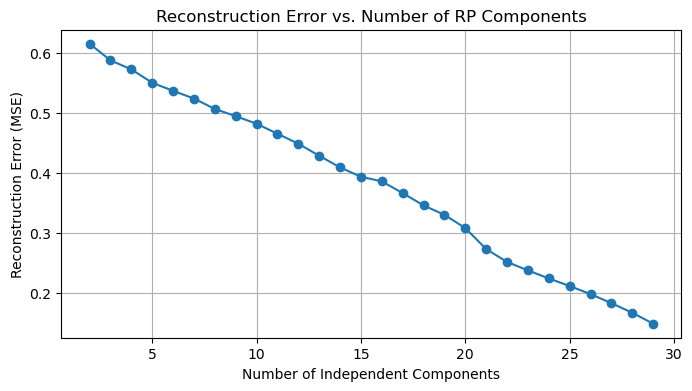

In [18]:
n_range = range(2, 30)
reconstruction_errors = []

for n in n_range:
    rp_model = RandomProjectionDecomposition(n_components=n)
    rp_model.fit(df)
    reconstruction_errors.append(rp_model.reconstruction_error_)

plt.figure(figsize=(8, 4))
plt.plot(n_range, reconstruction_errors, marker='o', linestyle='-')
plt.xlabel("Number of Independent Components")
plt.ylabel("Reconstruction Error (MSE)")
plt.title("Reconstruction Error vs. Number of RP Components")
plt.grid(True)
plt.show()

In [19]:
rp_model = RandomProjectionDecomposition(n_components=20, save_data=True)
rp_model.fit(df)

rp_model.save_results(filename="../datasets/dr/mkt/rp_train.csv")
rp_model.save_model(filename="../model_checkpoints/mkt/rp_model.pkl")

# Test Dataset
dataset_path = "../datasets/cleaned_data/mkt_camp_v1/test.csv"
df_test = pd.read_csv(dataset_path)
RandomProjectionDecomposition.inference("../model_checkpoints/mkt/rp_model.pkl", df_test, output_file="../datasets/dr/mkt/rp_test.csv")

Transformed data saved to ../datasets/dr/mkt/rp_train.csv
Random Projection model saved to ../model_checkpoints/mkt/rp_model.pkl
Loading Random Projection model from ../model_checkpoints/mkt/rp_model.pkl...
Model loaded successfully!
Transformed data saved to ../datasets/dr/mkt/rp_test.csv


# Spotify

In [3]:
dataset_path = "../datasets/cleaned_data/spotify_v1/train.csv"
df = pd.read_csv(dataset_path)

# PCA

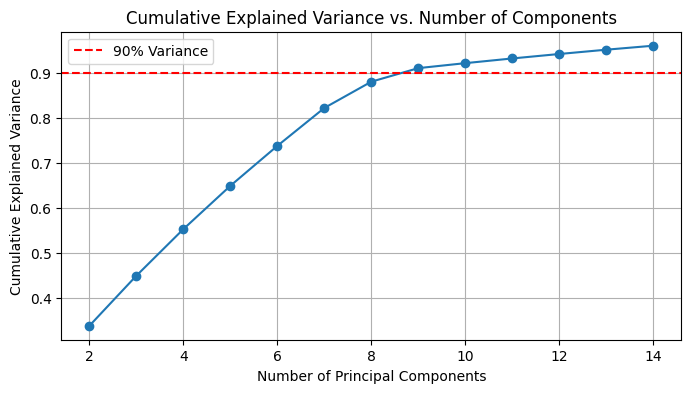

In [6]:
n_range = range(2, 15)
cumulative_variances = []

for n in n_range:
    pca_model = PCADecomposition(n_components=n)
    pca_model.fit(df)
    cumulative_variances.append(pca_model.cumulative_variance_[-1])

plt.figure(figsize=(8, 4))
plt.plot(n_range , cumulative_variances, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs. Number of Components")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
pca_model = PCADecomposition(n_components=12, save_data=True)
pca_model.fit(df)

pca_model.save_results(filename="../datasets/dr/spotify/pca_train.csv")
pca_model.save_model(filename="../model_checkpoints/spotify/pca_model.pkl")

# Test Dataset
dataset_path = "../datasets/cleaned_data/spotify_v1/test.csv"
df_test = pd.read_csv(dataset_path)
PCADecomposition.inference("../model_checkpoints/spotify/pca_model.pkl", df_test, output_file="../datasets/dr/spotify/pca_test.csv")

Transformed data saved to ../datasets/dr/spotify/pca_train.csv
PCA model saved to ../model_checkpoints/spotify/pca_model.pkl
Loading PCA model from ../model_checkpoints/spotify/pca_model.pkl...
Model loaded successfully!
Transformed data saved to ../datasets/dr/spotify/pca_test.csv


# ICA

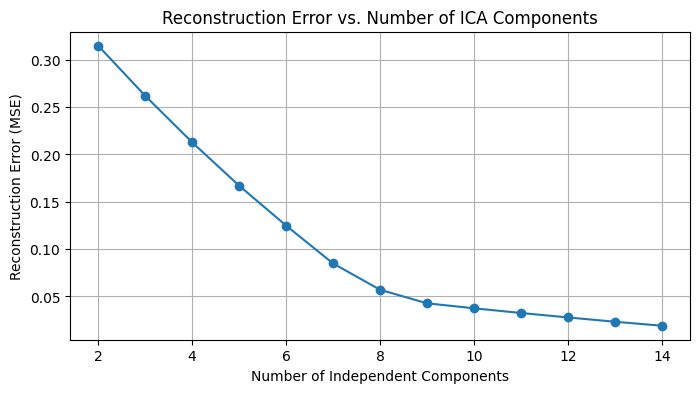

In [11]:
n_range = range(2, 15)
reconstruction_errors = []

for n in n_range:
    ica_model = ICADecomposition(n_components=n)
    ica_model.fit(df)
    reconstruction_errors.append(ica_model.reconstruction_error_)

plt.figure(figsize=(8, 4))
plt.plot(n_range, reconstruction_errors, marker='o', linestyle='-')
plt.xlabel("Number of Independent Components")
plt.ylabel("Reconstruction Error (MSE)")
plt.title("Reconstruction Error vs. Number of ICA Components")
plt.grid(True)
plt.show()

In [13]:
ica_model = ICADecomposition(n_components=12, save_data=True)
ica_model.fit(df)

ica_model.save_results(filename="../datasets/dr/spotify/ica_train.csv")
ica_model.save_model(filename="../model_checkpoints/spotify/ica_model.pkl")

# Test Dataset
dataset_path = "../datasets/cleaned_data/spotify_v1/test.csv"
df_test = pd.read_csv(dataset_path)
ICADecomposition.inference("../model_checkpoints/spotify/ica_model.pkl", df_test, output_file="../datasets/dr/spotify/ica_test.csv")

Transformed data saved to ../datasets/dr/spotify/ica_train.csv
ICA model saved to ../model_checkpoints/spotify/ica_model.pkl
Loading ICA model from ../model_checkpoints/spotify/ica_model.pkl...
Model loaded successfully!
Transformed data saved to ../datasets/dr/spotify/ica_test.csv


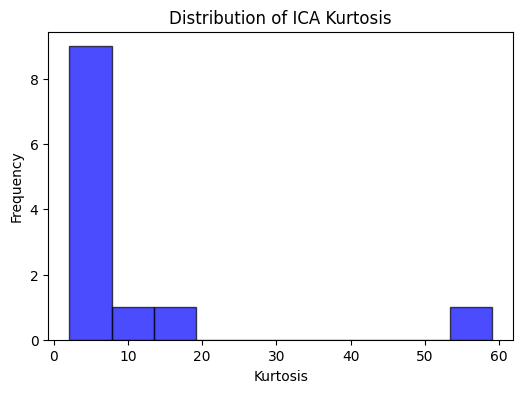

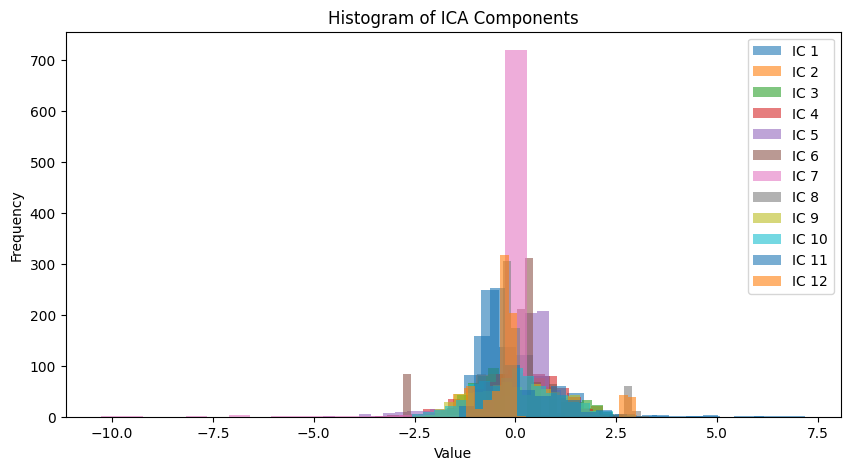

In [14]:
X_ica = ica_model.fit(df)

ic_kurtosis = kurtosis(X_ica, axis=0, fisher=False)

plt.figure(figsize=(6, 4))
plt.hist(ic_kurtosis, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("Kurtosis")
plt.ylabel("Frequency")
plt.title("Distribution of ICA Kurtosis")
plt.show()

# Plot distribution of ICA components
plt.figure(figsize=(10, 5))
for i in range(X_ica.shape[1]):
    plt.hist(X_ica[:, i], bins=20, alpha=0.6, label=f"IC {i+1}")

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of ICA Components")
plt.legend()
plt.show()

# RP

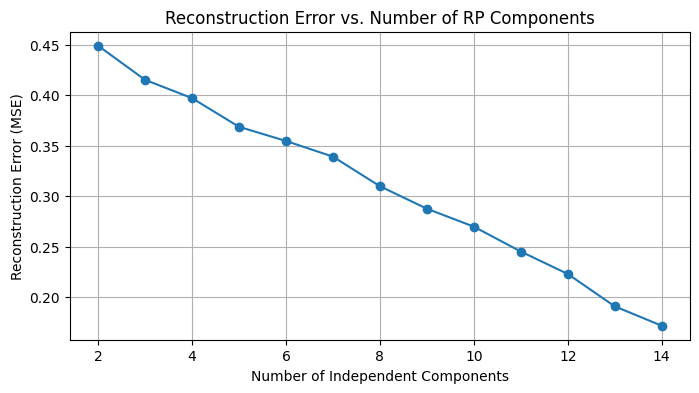

In [15]:
n_range = range(2, 15)
reconstruction_errors = []

for n in n_range:
    rp_model = RandomProjectionDecomposition(n_components=n)
    rp_model.fit(df)
    reconstruction_errors.append(rp_model.reconstruction_error_)

plt.figure(figsize=(8, 4))
plt.plot(n_range, reconstruction_errors, marker='o', linestyle='-')
plt.xlabel("Number of Independent Components")
plt.ylabel("Reconstruction Error (MSE)")
plt.title("Reconstruction Error vs. Number of RP Components")
plt.grid(True)
plt.show()

In [16]:
rp_model = RandomProjectionDecomposition(n_components=12, save_data=True)
rp_model.fit(df)

rp_model.save_results(filename="../datasets/dr/spotify/rp_train.csv")
rp_model.save_model(filename="../model_checkpoints/spotify/rp_model.pkl")

# Test Dataset
dataset_path = "../datasets/cleaned_data/spotify_v1/test.csv"
df_test = pd.read_csv(dataset_path)
RandomProjectionDecomposition.inference("../model_checkpoints/spotify/rp_model.pkl", df_test, output_file="../datasets/dr/spotify/rp_test.csv")

Transformed data saved to ../datasets/dr/spotify/rp_train.csv
Random Projection model saved to ../model_checkpoints/spotify/rp_model.pkl
Loading Random Projection model from ../model_checkpoints/spotify/rp_model.pkl...
Model loaded successfully!
Transformed data saved to ../datasets/dr/spotify/rp_test.csv
